Entrega 3

In [20]:
!pip install pingouin

In [21]:
from scipy.fftpack import fft;
import matplotlib.pyplot as plt;
import numpy as np;
import scipy.io as sio;
import numpy as np;
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import pingouin as pg


In [22]:
import zipfile

# Nombre del archivo .zip (ya que está en la misma carpeta)
archivo_zip = 'datos_senales_datos_parkinson_cursos.zip'

# Ruta donde quieres descomprimir los archivos (misma carpeta)
ruta_destino = './'

# Descomprimir el archivo
with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
    zip_ref.extractall(ruta_destino)

print("Archivo descomprimido con éxito.")


Archivo descomprimido con éxito.


In [23]:
!cp /content/drive/Shareddrives/biosenales_sistemas/datos_senales_datos_parkinson_cursos.zip .
!unzip datos_senales_datos_parkinson_cursos.zip

"cp" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"unzip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [24]:
import os
directorio_actual=os.getcwd()
print(directorio_actual)

c:\Users\erika\OneDrive - Universidad de Antioquia\UdeA\2024-2\Bioseñales\Laboratorio\Laboratorio-biosenales\Práctica 3


In [25]:
archivos=os.listdir(directorio_actual + "/control")
print(len(archivos))

36


In [26]:
archivos[0]

'C001R_EP_reposo.mat'

In [27]:
#ruta de un archivo
path_subjecti=(directorio_actual + "/control" + "/" + archivos[0])
#1 CARGAR EL ARCHIVO
data = sio.loadmat(path_subjecti)
data=data['data']

In [28]:
data.shape

(8, 2000, 180)

In [29]:
print("Variable python: " + str(type(data)));
#características básicas de ndarray
print("Tipo de variable cargada: " + str(data.dtype));
print("Dimensiones de los datos cargados: " + str(data.shape));
print("Numero de dimensiones: " + str(data.ndim));
print("Tamanio: " + str(data.size));
print("Tamanio en memoria (bytes): " + str(data.nbytes));

Variable python: <class 'numpy.ndarray'>
Tipo de variable cargada: float64
Dimensiones de los datos cargados: (8, 2000, 180)
Numero de dimensiones: 3
Tamanio: 2880000
Tamanio en memoria (bytes): 23040000


In [30]:
senal_continua = np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]),order='F')

In [31]:
senal_continua.shape

(8, 360000)

Dimensiones de los datos cargados: (8, 360000)


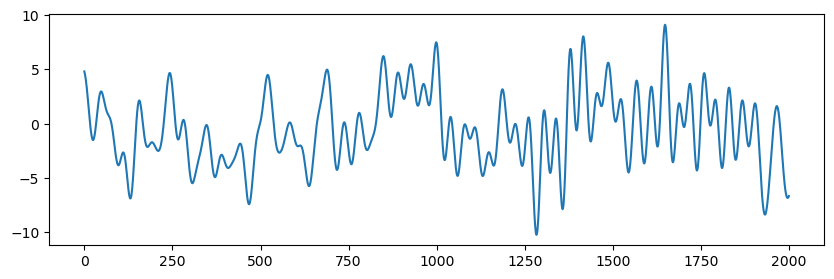

In [32]:
print("Dimensiones de los datos cargados: " + str(senal_continua.shape));
fig = plt.figure(figsize=(10,3))
#fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.plot(senal_continua[0,0:2000])
plt.show()

 1.	Implemente una función que reciba una señal de múltiples canales y épocas y calcule la Energía de promedio de cada canal.

In [40]:
import os
import numpy as np
import scipy.io as sio

directorio_actual = os.getcwd()
print("Directorio actual:", directorio_actual)

fs = 1000
num_canales = 8

# Función de promedio
def calcular_energia_promedio(senal_continua):
    energia_por_canal = np.sum(senal_continua**2, axis=1)  
    energia_promedio = energia_por_canal / senal_continua.shape[1]  #la operación de suma se hace a lo largo de la segunda dimensión
    
    return energia_promedio

#ENERGIA PROMEDIO PARA GRUPO CONTROL
archivos_control = os.listdir(directorio_actual + "/control")
print("Número de archivos en control:", len(archivos_control))
# Cargar y procesar los archivos de control
for i in range(len(archivos_control)):
    # Ruta del archivo
    ruta_archivo = os.path.join(directorio_actual + "/control", os.listdir(directorio_actual + "/control")[i])#destermina que lugar exacto
    
    # 1 CARGAR EL ARCHIVO
    data = sio.loadmat(ruta_archivo)
    data = data["data"]
    
    # 2 VOLVERLO CONTINUO
    # se nombran las tres dimenciones de las matrices de los datos
    sensores = data.shape[0]
    puntos = data.shape[1]
    epocas = data.shape[2]
    senal_continua = np.reshape(data, (sensores, puntos * epocas), order='F')
    #APLICAR EL ANALISIS canal por canal
    # Con la información clara, se calculara el promedio de la energia canal*canal
    energia_promedio_control = calcular_energia_promedio(senal_continua)
    
    # Mostrar los resultados
    #print(f"Energía promedio de cada canal para el grupo poblacional control {archivos_control[i]}:")
    #for c in range(num_canales):
     #   print(f"Canal {c+1}: {energia_promedio_control[c]}")
    #print("\n")
promedio_energia_archivo_control = np.mean(energia_promedio_control)
print(f"Promedio total de la energía de los 8 canales en el todos los grupos de control : {promedio_energia_archivo_control}\n")

#ENERGIA PROMEDIO PARA GRUPO PARKINSON
archivos_parkinson = os.listdir(directorio_actual + "/parkinson")
print("Número de archivos en parkinson:", len(archivos_parkinson))

# Cargar y procesar los archivos de parkinson
for i in range(len(archivos_parkinson)):
    # Ruta del archivo
    ruta_archivo = os.path.join(directorio_actual + "/parkinson", archivos_parkinson[i])
    
    # 1 CARGAR EL ARCHIVO
    data = sio.loadmat(ruta_archivo)
    data = data["data"]
    
    # 2 VOLVERLO CONTINUO, es decir las 3 dimensiones  
    sensores = data.shape[0]
    puntos = data.shape[1]
    epocas = data.shape[2] 
    senal_continua = np.reshape(data, (sensores, puntos * epocas), order='F')
    #APLICAR EL ANALISIS canal por canal
    #calcular energia promedio de canal *canal para el grupo con Parkinson
    energia_promedio_parkinson = calcular_energia_promedio(senal_continua)
    
    # Mostrar los  resultados para Parkinson
    #print(f"Energía promedio de cada canal para el grupo poblacional con Parkinson {archivos_parkinson[i]}:")
    #for c in range(num_canales):
     #   print(f"Canal {c+1}: {energia_promedio_parkinson[c]}")
    #print("\n")
promedio_energia_archivo_parkinson = np.mean(energia_promedio_parkinson)
print(f"Promedio total de la energía de los 8 canales entre todos los grupos de parkinson: {promedio_energia_archivo_parkinson}\n")

Directorio actual: c:\Users\erika\OneDrive - Universidad de Antioquia\UdeA\2024-2\Bioseñales\Laboratorio\Laboratorio-biosenales\Práctica 3
Número de archivos en control: 36
Promedio total de la energía de los 8 canales en el todos los grupos de control : 14.243462331311584

Número de archivos en parkinson: 23
Promedio total de la energía de los 8 canales entre todos los grupos de parkinson: 10.478910977311648

